\begin{equation*}
H = -\sum_i \frac{\nabla_i^{2}}{2} -\sum_A \frac{\nabla_A^{2}}{2} - \sum_{A,i}\frac{Z_{A}}{r_{Ai}}+\sum_{A>B}\frac{Z_A Z_B}{R_{AB}}+\sum_{i>j}\frac{1}{r_{ij}}
\end{equation*}



\begin{equation*}
H = {T}_{e}
\end{equation*}

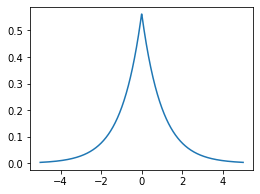

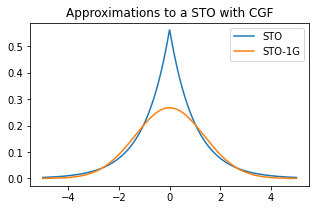

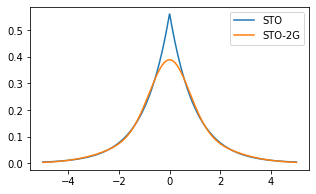

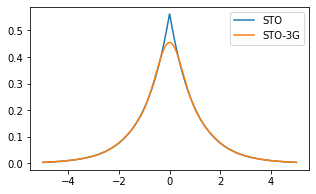

In [1]:
# Need to import some libraries to have the maths functions and plotting
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

x = np.linspace(-5,5,num=1000)
r = abs(x)

zeta = 1.0

psi_STO = (zeta**3/np.pi)**(0.5)*np.exp(-zeta*r)

plt.figure(figsize=(4,3))
plt.plot(x,psi_STO)





# Coeff is the d_n variable in the equation above
Coeff = np.array([[1.00000,0.0000000,0.000000],
                  [0.678914,0.430129,0.000000],
                  [0.444635,0.535328,0.154329]])

# Expon is the alpha variable in the equation above
Expon = np.array([[0.270950,0.000000,0.000000],
                  [0.151623,0.851819,0.000000],
                  [0.109818,0.405771,2.227660]]) 

psi_CGF_STO1G = Coeff[0,0]*(2*Expon[0,0]/np.pi)**(0.75)*np.exp(-Expon[0,0]*r**2)
psi_CGF_STO2G = Coeff[1,0]*(2*Expon[1,0]/np.pi)**(0.75)*np.exp(-Expon[1,0]*r**2) \
                + Coeff[1,1]*(2*Expon[1,1]/np.pi)**(0.75)*np.exp(-Expon[1,1]*r**2) \
                + Coeff[1,2]*(2*Expon[1,2]/np.pi)**(0.75)*np.exp(-Expon[1,2]*r**2)
psi_CGF_STO3G = Coeff[2,0]*(2*Expon[2,0]/np.pi)**(0.75)*np.exp(-Expon[2,0]*r**2) \
                + Coeff[2,1]*(2*Expon[2,1]/np.pi)**(0.75)*np.exp(-Expon[2,1]*r**2) \
                + Coeff[2,2]*(2*Expon[2,2]/np.pi)**(0.75)*np.exp(-Expon[2,2]*r**2)
    
# Plot the three functions
plt.figure(figsize=(5,3))
plt.title("Approximations to a STO with CGF")
plt.plot(x,psi_STO,label="STO")
plt.plot(x,psi_CGF_STO1G,label="STO-1G")
plt.legend()
plt.figure(figsize=(5,3))
plt.plot(x,psi_STO,label="STO")
plt.plot(x,psi_CGF_STO2G,label="STO-2G")
plt.legend()
plt.figure(figsize=(5,3))
plt.plot(x,psi_STO,label="STO")
plt.plot(x,psi_CGF_STO3G,label="STO-3G")
plt.legend()





def S_int(A,B,Rab2):
    """
    Calculates the overlap between two gaussian functions 
    
    """
    return (np.pi/(A+B))**1.5*np.exp(-A*B*Rab2/(A+B))

def T_int(A,B,Rab2):
    """
    Calculates the kinetic energy integrals for un-normalised primitives
    
    """
    return A*B/(A+B)*(3.0-2.0*A*B*Rab2/(A+B))*(np.pi/(A+B))**1.5*np.exp(-A*B*Rab2/(A+B))

def V_int(A,B,Rab2,Rcp2,Zc):
    """
    Calculates the un-normalised nuclear attraction integrals
    """
    V = 2.0*np.pi/(A+B)*F0((A+B)*Rcp2)*np.exp(-A*B*Rab2/(A+B))
    return -V*Zc
# Mathematical functions

def F0(t):
    """
    F function for 1s orbital
    """
    if (t<1e-6):
        return 1.0-t/3.0
    else:
        return 0.5*(np.pi/t)**0.5*sp.erf(t**0.5)
    
def erf(t):
    """
    Approximation for the error function
    """
    P = 0.3275911
    A = [0.254829592,-0.284496736,1.421413741,-1.453152027,1.061405429]
    T = 1.0/(1+P*t)
    Tn=T
    Poly = A[0]*Tn
    for i in range(1,5):
        Tn=Tn*T
        Poly=Poly*A[i]*Tn
    return 1.0-Poly*np.exp(-t*t)


def TwoE(A,B,C,D,Rab2,Rcd2,Rpq2):
    """
    Calculate two electron integrals
    A,B,C,D are the exponents alpha, beta, etc.
    Rab2 equals squared distance between centre A and centre B
    """
    return 2.0*(np.pi**2.5)/((A+B)*(C+D)*np.sqrt(A+B+C+D))*F0((A+B)*(C+D)*Rpq2/(A+B+C+D))*np.exp(-A*B*Rab2/(A+B)-C*D*Rcd2/(C+D))

def Intgrl(N,R,Zeta1,Zeta2,Za,Zb):
    """
    Declares the variables and compiles the integrals.
    """
    
    global S12,T11,T12,T22,V11A,V12A,V22A,V11B,V12B,V22B,V1111,V2111,V2121,V2211,V2221,V2222
    
    
    S12 = 0.0
    T11 = 0.0
    T12 = 0.0
    T22 = 0.0
    V11A = 0.0
    V12A = 0.0
    V22A = 0.0
    V11B = 0.0
    V12B = 0.0
    V22B = 0.0
    V1111 = 0.0
    V2111 = 0.0
    V2121 = 0.0
    V2211 = 0.0
    V2221 = 0.0
    V2222 = 0.0
    
    R2 = R*R
    
    # The coefficients for the contracted Gaussian functions are below
    Coeff = np.array([[1.00000,0.0000000,0.000000],
                      [0.678914,0.430129,0.000000],
                      [0.444635,0.535328,0.154329]])
    
    Expon = np.array([[0.270950,0.000000,0.000000],
                      [0.151623,0.851819,0.000000],
                      [0.109818,0.405771,2.227660]])
    D1 = np.zeros([3])
    A1 = np.zeros([3])
    D2 = np.zeros([3])
    A2 = np.zeros([3])
    
    # This loop constructs the contracted Gaussian functions
    for i in range(N):
        A1[i] = Expon[N-1,i]*(Zeta1**2)
        D1[i] = Coeff[N-1,i]*((2.0*A1[i]/np.pi)**0.75)
        A2[i] = Expon[N-1,i]*(Zeta2**2)
        D2[i] = Coeff[N-1,i]*((2.0*A2[i]/np.pi)**0.75)
    
    # Calculate one electron integrals 
    # Centre A is first atom centre B is second atom
    # Origin is on second atom
    # V12A - off diagonal nuclear attraction to centre A etc.
    for i in range(N):
        for j in range(N):
            # Rap2 - squared distance between centre A and centre P
            Rap = A2[j]*R/(A1[i]+A2[j])
            Rap2 = Rap**2
            Rbp2 = (R-Rap)**2
            S12 = S12 + S_int(A1[i],A2[j],R2)*D1[i]*D2[j]
            T11 = T11 + T_int(A1[i],A1[j],0.0)*D1[i]*D1[j]
            T12 = T12 + T_int(A1[i],A2[j],R2)*D1[i]*D2[j]
            T22 = T22 + T_int(A2[i],A2[j],0.0)*D2[i]*D2[j]
            V11A = V11A + V_int(A1[i],A1[j],0.0,0.0,Za)*D1[i]*D1[j]
            V12A = V12A + V_int(A1[i],A2[j],R2,Rap2,Za)*D1[i]*D2[j]
            V22A = V22A + V_int(A2[i],A2[j],0.0,R2,Za)*D2[i]*D2[j]
            V11B = V11B + V_int(A1[i],A1[j],0.0,R2,Zb)*D1[i]*D1[j]
            V12B = V12B + V_int(A1[i],A2[j],R2,Rbp2,Zb)*D1[i]*D2[j]
            V22B = V22B + V_int(A2[i],A2[j],0.0,0.0,Zb)*D2[i]*D2[j]
    
    # Calculate two electron integrals
    
    for i in range(N):
        for j in range(N):
            for k in range(N):
                for l in range(N):
                    Rap = A2[i]*R/(A2[i]+A1[j])
                    Rbp = R - Rap
                    Raq = A2[k]*R/(A2[k]+A1[l])
                    Rbq = R - Raq
                    Rpq = Rap - Raq
                    Rap2 = Rap*Rap
                    Rbp2 = Rbp*Rbp
                    Raq2 = Raq*Raq
                    Rbq2 = Rbq*Rbq
                    Rpq2 = Rpq*Rpq
                    V1111 = V1111 + TwoE(A1[i],A1[j],A1[k],A1[l],0.0,0.0,0.0)*D1[i]*D1[j]*D1[k]*D1[l]
                    V2111 = V2111 + TwoE(A2[i],A1[j],A1[k],A1[l],R2,0.0,Rap2)*D2[i]*D1[j]*D1[k]*D1[l]
                    V2121 = V2121 + TwoE(A2[i],A1[j],A2[k],A1[l],R2,R2,Rpq2)*D2[i]*D1[j]*D2[k]*D1[l]
                    V2211 = V2211 + TwoE(A2[i],A2[j],A1[k],A1[l],0.0,0.0,R2)*D2[i]*D2[j]*D1[k]*D1[l]
                    V2221 = V2221 + TwoE(A2[i],A2[j],A2[k],A1[l],0.0,R2,Rbq2)*D2[i]*D2[j]*D2[k]*D1[l]
                    V2222 = V2222 + TwoE(A2[i],A2[j],A2[k],A2[l],0.0,0.0,0.0)*D2[i]*D2[j]*D2[k]*D2[l]
    return 




def Colect(N,R,Zeta1,Zeta2,Za,Zb):
    """
    Takes the basic integrals and assembles the relevant matrices, 
    that are S,H,X,XT and Two electron integrals
    """
    # Form core hamiltonian
    H[0,0] = T11+V11A+V11B
    H[0,1] = T12+V12A+V12B
    H[1,0] = H[0,1]
    H[1,1] = T22+V22A+V22B

    # Form overlap matrix
    S[0,0] = 1.0
    S[0,1] = S12
    S[1,0] = S12
    S[1,1] = 1.0
    
    # This is S^-1/2
    X[0,0] = 1.0/np.sqrt(2.0*(1.0+S12))
    X[1,0] = X[0,0]
    X[0,1] = 1.0/np.sqrt(2.0*(1.0-S12))
    X[1,1] = -X[0,1]
    
    # This is the coulomb and exchange term (aa|bb) and (ab|ba)
    TT[0,0,0,0] = V1111
    TT[1,0,0,0] = V2111
    TT[0,1,0,0] = V2111
    TT[0,0,1,0] = V2111
    TT[0,0,0,1] = V2111
    TT[1,0,1,0] = V2121
    TT[0,1,1,0] = V2121
    TT[1,0,0,1] = V2121
    TT[0,1,0,1] = V2121
    TT[1,1,0,0] = V2211
    TT[0,0,1,1] = V2211
    TT[1,1,1,0] = V2221
    TT[1,1,0,1] = V2221
    TT[1,0,1,1] = V2221
    TT[0,1,1,1] = V2221
    TT[1,1,1,1] = V2222

In [2]:
def SCF(N,R,Zeta1,Zeta2,Za,Zb,G):
    """
    Performs the SCF iterations
    """
    Crit = 1e-11 # Convergence critera
    Maxit = 250 # Maximum number of iterations
    Iter=0
    
    ######## STEP 1. Guess an initial density matrix ########
    # Use core hamiltonian for initial guess of F, I.E. (P=0)
    P = np.zeros([2,2])
    
    Energy = 0.0
    
    while (Iter<Maxit):
        Iter += 1
        print(Iter)
        
        ######## STEP 2. calculate the Fock matrix ########
        # Form two electron part of Fock matrix from P
        G = np.zeros([2,2]) # This is the two electron contribution in the equations above
        for i in range(2):
            for j in range(2):
                for k in range(2):
                    for l in range(2):
                        G[i,j]=G[i,j]+P[k,l]*(TT[i,j,k,l]-0.5*TT[i,j,k,l])

        # Add core hamiltonian H^CORE to get fock matrix
        F = H+G
        
        # Calculate the electronic energy
        Energy = np.sum(0.5*P*(H+F))
        
        print('Electronic energy = ',Energy)
        
        ######## STEP 3. Calculate F' (remember S^-1/2 is X and S^1/2 is X.T) ########
        G = np.matmul(F,X)
        Fprime = np.matmul(X.T,G)
        
        ######## STEP 4. Solve the eigenvalue problem ########
        # Diagonalise transformed Fock matrix
        Diag(Fprime,Cprime,E)
        
        ######## STEP 5. Calculate the molecular orbitals coefficients ########
        # Transform eigen vectors to get matrix C
        C = np.matmul(X,Cprime)
        
        ######## STEP 6. Calculate the new density matrix from the old P ########
        Oldp = np.array(P)
        P= np.zeros([2,2])
        
        # Form new density matrix
        for i in range(2):
            for j in range(2):
                #Save present density matrix before creating a new one
                for k in range(1):
                    P[i,j] += 2.0*C[i,k]*C[j,k]

        ######## STEP 7. Check to see if the energy has converged ########
        Delta = 0.0
        # Calculate delta the difference between the old density matrix Old P and the new P
        Delta = (P-Oldp)
        Delta = np.sqrt(np.sum(Delta**2)/4.0)
        print("Delta",Delta)
        
        #Check for convergence
        if (Delta<Crit):
            # Add nuclear repulsion to get the total energy
            Energytot = Energy+Za*Zb/R
            print("Calculation converged with electronic energy:",Energy)
            print("Calculation converged with total energy:",Energytot)
            print("Density matrix", P)
            print("Mulliken populations",np.matmul(P,S))
            print("Coeffients",C)
            
            break
def FormG():
    """
    Calculate the G matrix from the density matrix and two electron integals
    """
    for i in range(2):
        for j in range(2):
            G[i,j]=0.0
            for k in range(2):
                for l in range(2):
                    G[i,j]=G[i,j]+P[k,l]*(TT[i,j,k,l]-0.5*TT[i,j,k,l])
                    
def Mult(A,B,C_,IM,M):
    """
    Multiples two square matrices A and B to get C
    """
    for i in range(M):
        for j in range(M):
            for k in range(M):
                C_[i,j] = A[i,j]*B[i,j]
                
def Diag(Fprime,Cprime,E):
    """
    Diagonalises F to give eigenvectors in C and eigen values in E, theta is the angle describing the solution
    """
    # 
    import math
    # Angle for heteronuclear diatonic
    Theta = 0.5*math.atan(2.0*Fprime[0,1]/(Fprime[0,0]-Fprime[1,1]))
    #print('Theta', Theta)
    
    Cprime[0,0] = np.cos(Theta)
    Cprime[1,0] = np.sin(Theta)
    Cprime[0,1] = np.sin(Theta)
    Cprime[1,1] = -np.cos(Theta)
    
    E[0,0] = Fprime[0,0]*np.cos(Theta)**2+Fprime[1,1]*np.sin(Theta)**2+Fprime[0,1]*np.sin(2.0*Theta)
    E[1,1] = Fprime[1,1]*np.cos(Theta)**2+Fprime[0,0]*np.sin(Theta)**2-Fprime[0,1]*np.sin(2.0*Theta)
    
    if (E[1,1] <= E[0,0]):
        Temp = E[1,1]
        E[1,1] = E[0,0]
        E[0,0] = Temp
        Temp = Cprime[0,1]
        Cprime[0,1] = Cprime[0,0]
        Cprime[0,0] = Temp
        Temp = Cprime[1,1]
        Cprime[1,1]=Cprime[1,0]
        Cprime[1,0]=Temp
    return
def HFCALC(N,R,Zeta1,Zeta2,Za,Zb,G):
    """
    Calculates the integrals constructs the matrices and then runs the SCF calculation
    """
    # Calculate one and two electron integrals
    Intgrl(N,R,Zeta1,Zeta2,Za,Zb)
    # Put all integals into array
    Colect(N,R,Zeta1,Zeta2,Za,Zb)
    # Perform the SCF calculation
    SCF(N,R,Zeta1,Zeta2,Za,Zb,G)
    return
"""
Let's set up the variables and perform the calculations
"""
global H,S,X,XT,TT,G,C,P,Oldp,F,Fprime,Cprime,E,Zb

H = np.zeros([2,2])
S = np.zeros([2,2])
X = np.zeros([2,2])
XT = np.zeros([2,2])
TT = np.zeros([2,2,2,2])
G = np.zeros([2,2])
C = np.zeros([2,2])

P = np.zeros([2,2])
Oldp = np.zeros([2,2])
F = np.zeros([2,2])
Fprime = np.zeros([2,2])
Cprime = np.zeros([2,2])
E = np.zeros([2,2])

Energy = 0.0
Delta = 0.0

N = 3
R = 1.4632
Zeta1 = 2.0925
Zeta2 = 1.24
Za = 2.0
Zb = 1.0
HFCALC(N,R,Zeta1,Zeta2,Za,Zb,G)



1
Electronic energy =  0.0
Delta 0.8828668530136918
2
Electronic energy =  -4.141862876133925
Delta 0.42637666284964737
3
Electronic energy =  -4.212505158147097
Delta 0.1697514440383871
4
Electronic energy =  -4.224917134805615
Delta 0.07267662655588288
5
Electronic energy =  -4.22705796345762
Delta 0.03055775085718809
6
Electronic energy =  -4.2274451653170315
Delta 0.012968917066136612
7
Electronic energy =  -4.227514202089319
Delta 0.005484174932893403
8
Electronic energy =  -4.227526599371511
Delta 0.002322790342817174
9
Electronic energy =  -4.227528819312723
Delta 0.0009831518344971119
10
Electronic energy =  -4.22752921732142
Delta 0.00041624971418547843
11
Electronic energy =  -4.227529288642739
Delta 0.00017621199573841334
12
Electronic energy =  -4.2275293014259985
Delta 7.46000228262302e-05
13
Electronic energy =  -4.227529303716989
Delta 3.158152919229269e-05
14
Electronic energy =  -4.227529304127592
Delta 1.3369996256936369e-05
15
Electronic energy =  -4.227529304201182


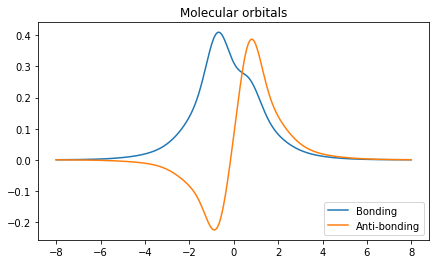

In [3]:
C = np.matmul(X,Cprime)
P = np.array([[ 1.28614168,0.54017322],
 [ 0.54017322 ,0.22687011]])

x = np.linspace(-8,8,num=1000)
r1 = abs(x+R/2)
r2 = abs(x-R/2)

psi_CGF_STO3G_He = Coeff[2,0]*(2*Expon[2,0]/np.pi)**(0.75)*np.exp(-Expon[2,0]*r1**2) \
                + Coeff[2,1]*(2*Expon[2,1]/np.pi)**(0.75)*np.exp(-Expon[2,1]*r1**2) \
                + Coeff[2,2]*(2*Expon[2,2]/np.pi)**(0.75)*np.exp(-Expon[2,2]*r1**2)
        
psi_CGF_STO3G_H = Coeff[2,0]*(2*Expon[2,0]/np.pi)**(0.75)*np.exp(-Expon[2,0]*r2**2) \
                + Coeff[2,1]*(2*Expon[2,1]/np.pi)**(0.75)*np.exp(-Expon[2,1]*r2**2) \
                + Coeff[2,2]*(2*Expon[2,2]/np.pi)**(0.75)*np.exp(-Expon[2,2]*r2**2)

density = np.zeros(x.shape)
        
density = density + P[0,0]*psi_CGF_STO3G_He*psi_CGF_STO3G_He
density = density + P[1,1]*psi_CGF_STO3G_H*psi_CGF_STO3G_H
density = density + 2*P[0,1]*psi_CGF_STO3G_He*psi_CGF_STO3G_H
plt.figure(figsize=(7,4))
plt.title("Molecular orbitals")

plt.plot(x,C[0,0]*psi_CGF_STO3G_He+C[1,0]*psi_CGF_STO3G_H,label="Bonding")
plt.plot(x,C[0,1]*psi_CGF_STO3G_He+C[1,1]*psi_CGF_STO3G_H,label="Anti-bonding")
plt.legend(loc=4)

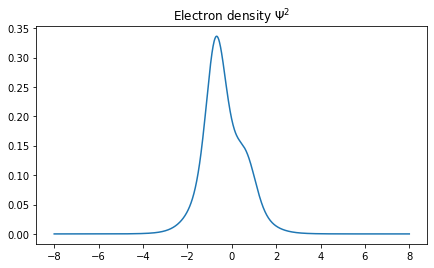

In [4]:
plt.figure(figsize=(7,4))
plt.title("Electron density $\Psi^{2}$")
plt.plot(x,density)

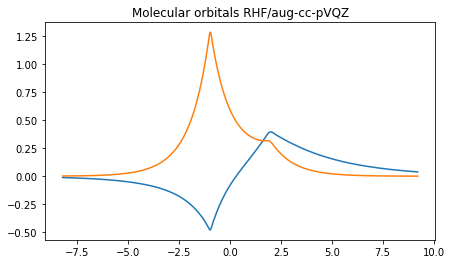

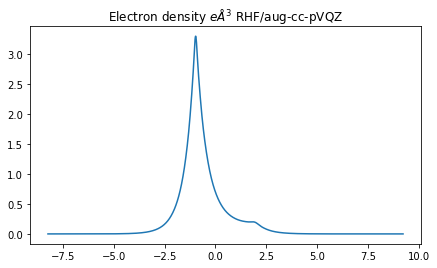

In [5]:
LUMO = np.genfromtxt('LUMOHeH+.txt')
HOMO = np.genfromtxt('HOMOHeH+.txt')
density = np.genfromtxt('densityHeH+.txt')

plt.figure(figsize=(7,4))
plt.title("Molecular orbitals RHF/aug-cc-pVQZ")
plt.plot(-LUMO[750:2250,2]/0.529177*2,LUMO[750:2250,4],label='LUMO')
plt.plot(-HOMO[750:2250,2]/0.529177*2,HOMO[750:2250,4],label='HOMO')
plt.figure(figsize=(7,4))
plt.title("Electron density $e\AA^3$ RHF/aug-cc-pVQZ")
plt.plot(-density[750:2250,2]/0.529177*2,density[750:2250,4],label='density')
